In [31]:
#Bringing in important libraries for data analysis
import pandas as pd 
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt 
import seaborn as sns

In [32]:
#Importing the dataset
data = pd.read_csv('/Users/seantrambadia/Desktop/train.csv')
print(data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [33]:
print(data['Age'].isna().sum())

177


In [34]:
#Replacing data values with 0 in the age column to eliminate 'NAN' values
data['Age'].fillna(0,inplace=True)

In [35]:
print(data['Age'])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     0.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


In [36]:
#Checking too make sure there are no missing age values
print(data['Age'].isna().sum())

0


In [37]:
#The average age of all passengers
data["Age"].mean()

23.79929292929293

In [38]:
#Performing mean imputation to replace the missing values
data['Age'].fillna(23.8,inplace=True)
print(data['Age'])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     0.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


In [39]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,0.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [40]:
#Performing mean imputation to replace the 0 values with the mean
data['Age'] = data['Age'].replace(0, 23.8)    
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,23.8,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [41]:
#Performing mode imputation to replace the missing values in the cabins and Embarked
data['Cabin'].fillna(data['Cabin'].mode()[0])
data['Embarked'].fillna(data['Embarked'].mode()[0])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [42]:
data["Pclass"] = data["Pclass"].apply(str)

In [43]:
#Creating list of categorical variables which need to be converted to dummy variables for model creation
cat_vars = []
for col in data.columns:
    if data.dtypes[col] == "object":
        cat_vars.append(col)
print(cat_vars)

['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [44]:
#Creating a set of dummy variables for all categorial vars
for col in data[cat_vars]:
    dummy = data.pop(col)
    data = pd.concat([data,pd.get_dummies(dummy, prefix = col)], axis = 1)
data.head(10)

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,"Name_Abbing, Mr. Anthony",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5,6,0,23.8,0,0,8.4583,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
6,7,0,54.0,0,0,51.8625,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,8,0,2.0,3,1,21.0750,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8,9,1,27.0,0,2,11.1333,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
9,10,1,14.0,1,0,30.0708,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [45]:
#Ridding the dataset of the survival column
labels = data.pop("Survived")

In [46]:
#Parsing the dataset into training and test subsets
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(data,labels,test_size=0.25)

In [47]:
#Implementing my randomforest classifier algorithm
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [48]:
#predicting the target  variables for my test cases
pred_var_x = rf.predict(x_test)


In [154]:
#Creating the confusion matrix for the random forest classifier 
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,pred_var_x)
print('139 correctly classified values of "1" and 47 correctly classified values of "0"')
print(" ")
print(confusion_matrix)

139 correctly classified values of "1" and 47 correctly classified values of "0"
 
[[139   7]
 [ 30  47]]


In [49]:
#Generating the AUC score for the random forest classifier algorithm with no parameters
from sklearn.metrics import roc_curve, auc 
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred_var_x)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.7880715175235724


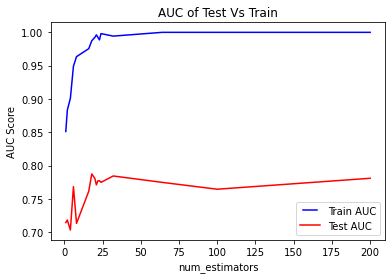

In [50]:
#Plotting the efficiency of the random forest algorithm, given the number of estimators used (the number of decision trees the forest will create)
num_estimators = [1,2,4,6,8,16,18,20,21,22,23,24,32,64,100,200]
train_results = []
test_results = []

for e in num_estimators:
    rf = RandomForestClassifier(n_estimators=e, n_jobs =-1)
    rf.fit(x_train,y_train)
    data_pred = rf.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train,data_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    pred_var_x = rf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred_var_x)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(num_estimators, train_results, "b", label = "Train AUC")
line2, = plt.plot(num_estimators, test_results, "r", label = "Test AUC")
plt.legend(handler_map = {line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC Score")
plt.xlabel("num_estimators")
plt.title("AUC of Test Vs Train")
plt.show()

In [52]:
#Picking my official Random Forest Model based on the x value which generated the max AUC value for the above plot 
rf_official = RandomForestClassifier(n_estimators = 30)
rf_official.fit(x_train,y_train)

RandomForestClassifier(n_estimators=30)

In [53]:
#Predicting the survived variables for the test subsets
official_var_x = rf_official.predict(x_test)

In [54]:
#Prining the official AUC score for the official random forest algorithm that I had stuck with
from sklearn.metrics import roc_curve, auc 
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, official_var_x)
roc_auc_official = auc(false_positive_rate, true_positive_rate)
print(roc_auc_official)

0.7586728340152998


In [2]:
###################################################################################################################

In [3]:
##                   Creating a Logistic regression model for the Titanic dataset                                ##

In [5]:
data1 = pd.read_csv('/Users/seantrambadia/Desktop/train.csv')

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [11]:
#Performing imputation methods on missing data 
data1['Age'].fillna(23.8,inplace=True)
data1.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,23.8,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [14]:
#Mode Imputation for the dataset with missing values
data1['Embarked'].fillna(data1['Embarked'].mode()[0])
data1['Cabin'].fillna(data1['Cabin'].mode()[0])

0      B96 B98
1          C85
2      B96 B98
3         C123
4      B96 B98
        ...   
886    B96 B98
887        B42
888    B96 B98
889       C148
890    B96 B98
Name: Cabin, Length: 891, dtype: object

In [16]:
#Coercing data types to strings for Pclass variable
data1["Pclass"] = data1["Pclass"].apply(str)

From the plot we may be able to indicate that gender could have a strong role in predicting survival


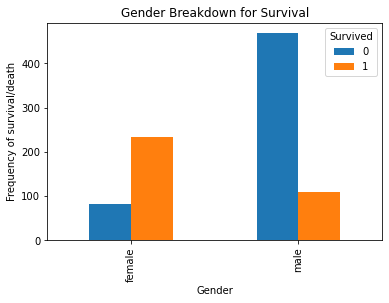

In [18]:
####Determining which categorial variables could possibly be a strong predictor within our model####
%matplotlib inline
pd.crosstab(data1.Sex,data1.Survived).plot(kind='bar')
plt.title('Gender Breakdown for Survival')
plt.xlabel('Gender')
plt.ylabel('Frequency of survival/death')

print("From the plot we may be able to indicate that gender could have a strong role in predicting survival")

This shows embarking class may also be a relevant predictor toward Survival or Death


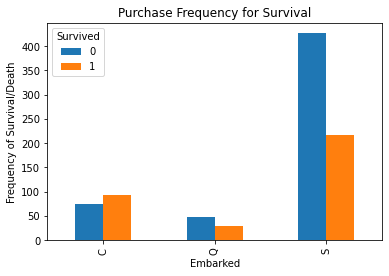

In [23]:

%matplotlib inline
pd.crosstab(data1.Embarked,data1.Survived).plot(kind='bar')
plt.title('Purchase Frequency for Survival')
plt.xlabel('Embarked')
plt.ylabel('Frequency of Survival/Death')
print("This shows embarking class may also be a relevant predictor toward Survival or Death")

This shows Pclass may be a relevant predictor toward Survival or Death


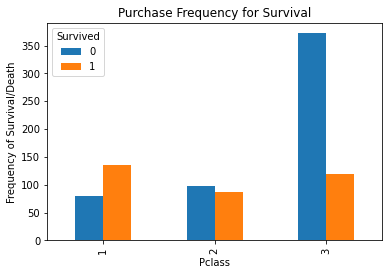

In [25]:
%matplotlib inline
pd.crosstab(data1.Pclass,data1.Survived).plot(kind='bar')
plt.title('Purchase Frequency for Survival')
plt.xlabel('Pclass')
plt.ylabel('Frequency of Survival/Death')
print("This shows Pclass may be a relevant predictor toward Survival or Death")

In [27]:
######Recreating the dataset with categorical variables######
cat_vars1 = []
for col in data1.columns:
    if data1.dtypes[col] == "object":
        cat_vars1.append(col)
print(cat_vars1)

['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [28]:
for col in data1[cat_vars1]:
    dummy = data1.pop(col)
    data1 = pd.concat([data1,pd.get_dummies(dummy, prefix = col)], axis = 1)
data1.head(10)

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,"Name_Abbing, Mr. Anthony",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,35.0,0,0,8.0500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5,6,0,23.8,0,0,8.4583,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
6,7,0,54.0,0,0,51.8625,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,8,0,2.0,3,1,21.0750,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
8,9,1,27.0,0,2,11.1333,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
9,10,1,14.0,1,0,30.0708,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [61]:
#Installing imblearn library
!pip install imblearn

     |████████████████████████████████| 167 kB 2.8 MB/s eta 0:00:01


In [64]:
#Importing the SMOTE algorithm to ensure balance of target variable 

x1 = data1.loc[:,data1.columns != 'Survived']
x2 = data1.loc[:,data1.columns == 'Survived']

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X1_train, X1_test, Y1_train, Y1_test = train_test_split(x1, x2, test_size=0.3, random_state=0)
columns = X1_train.columns 

os_data_X1,os_data_Y1=os.fit_sample(X1_train, Y1_train)
os_data_X = pd.DataFrame(data=os_data_X1,columns=columns )
os_data_Y = pd.DataFrame(data=os_data_Y1,columns=['Survived'])

#Checking the numbers of our data 
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_Y[os_data_Y['Survived']==0]))
print("Number of subscription",len(os_data_Y[os_data_Y['Survived']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_Y[os_data_Y['Survived']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_Y[os_data_Y['Survived']==1])/len(os_data_X))

length of oversampled data is  762
Number of no subscription in oversampled data 381
Number of subscription 381
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [72]:
print(os_data_X.columns)
print(os_data_Y['Survived'])

Index(['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Name_Abbing, Mr. Anthony',
       'Name_Abbott, Mr. Rossmore Edward',
       ...
       'Cabin_F G73', 'Cabin_F2', 'Cabin_F33', 'Cabin_F38', 'Cabin_F4',
       'Cabin_G6', 'Cabin_T', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object', length=1732)
0      1
1      1
2      0
3      0
4      0
      ..
757    1
758    1
759    1
760    1
761    1
Name: Survived, Length: 762, dtype: int64


In [75]:
Vars1 = ['Age','SibSp','Parch','Fare','Sex_female','Sex_male','Pclass_1','Pclass_2','Pclass_3','Embarked_C','Embarked_Q','Embarked_S']



In [77]:
#Implementing the logit model

X_official= os_data_X[Vars1]
Y_official = os_data_Y['Survived']

import statsmodels.api as sm
logit_model=sm.Logit(Y_official,X_official)
result=logit_model.fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.477538
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.311     
Dependent Variable: Survived         AIC:              751.7674  
Date:               2020-12-06 16:44 BIC:              807.3987  
No. Observations:   762              Log-Likelihood:   -363.88   
Df Model:           11               LL-Null:          -528.18   
Df Residuals:       750              LLR p-value:      8.1518e-64
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Age            0.0024    0.0068   0.3552  0.7224  -0.0109   0.0157
SibSp         -0.3927    0.1236  -3.1760  0.0015  -0.6350  -0.

In [80]:
#Importing logistic regression model from the logit model which was used
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X_official, Y_official, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X2_train, Y2_train)

/Users/seantrambadia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [81]:
#Predicting the accuracy of the logistic regression classifier on test set
y_pred = logreg.predict(X2_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X2_test, Y2_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [82]:
#Generating the AUC score for the official logistic regression model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y2_test, logreg.predict(X2_test))
fpr, tpr, thresholds = roc_curve(Y2_test, logreg.predict_proba(X2_test)[:,1])
logit_roc_auc_rate = auc(fpr,tpr)
print(logit_roc_auc_rate)

0.9039343009931246


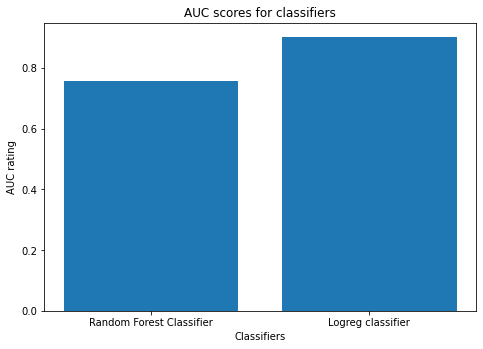

In [86]:
#Plotting the AUC scores of the logistic regression versus the random forest classifier
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
xlabs = ['Random Forest Classifier', 'Logreg classifier']
ylabs = [roc_auc_official,logit_roc_auc_rate]
ax.bar(xlabs,ylabs)
plt.title("AUC scores for classifiers")
plt.ylabel("AUC rating")
plt.xlabel("Classifiers")
plt.show()

In [155]:
#Confusion matrix for the logistic regression algorithm
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y2_test, y_pred)
print('100 correctly classified values of "1" and 91 correctly classified values of "0"')
print(" ")
print(confusion_matrix)

100 correctly classified values of "1" and 91 correctly classified values of "0"
 
[[100  19]
 [ 19  91]]
